In [1]:
import pandas as pd
import nltk
import string
pd.options.mode.chained_assignment = None

from bs4 import BeautifulSoup
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

In [42]:
data_store = pd. read_csv('train.csv',header=None, delimiter=',', skiprows=1, names=['text','label'])
data_store.shape

(40000, 2)

In [ ]:
sns.catplot(x="label", y="text", kind="swarm", data=data_store)

In [4]:
data_store['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

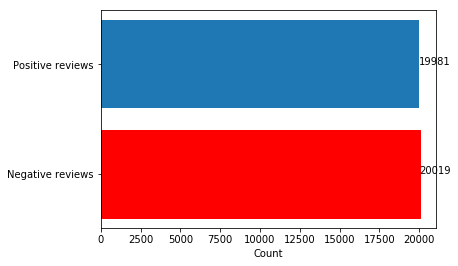

In [39]:
data1 = {'Negative reviews': 20019, 'Positive reviews': 19981}
name1 = list(data1.keys())
value1 = list(data1.values())

# data2 = {'Negative reviews': 18577, 'Positive reviews': 18248}
# name2 = list(data2.keys())
# value2 = list(data2.values())

# data3 = {'Negative reviews': 18074, 'Positive reviews': 17650}
# name3 = list(data3.keys())
# value3 = list(data3.values())

# fig, axs = plt.subplots(3, 1)

# axs[0].bar(name1, value1)
# axs[1].bar(name2, value2)
# axs[2].bar(name3, value3)

plt.xlabel("Count")
barlist = plt.barh(name1, value1)
barlist[0].set_color('r')

for index, value in enumerate(value1):
    plt.text(value, index,
             str(value))

plt.show()

IndexError: list index out of range

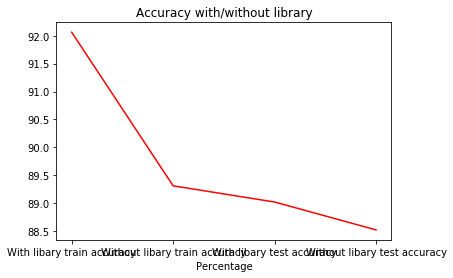

In [40]:
data1 = {'With libary train accuracy': 92.0625,
         'Without libary train accuracy': 89.31,
         'With libary test accuracy': 89.02,
         'Without libary test accuracy': 88.52}
name1 = list(data1.keys())
value1 = list(data1.values())

plt.title("Accuracy with/without library")
plt.xlabel("Percentage")
# plt.ylabel("")
barlist = plt.plot(name1, value1)
barlist[0].set_color('r')
barlist[1].set_color('pink')
barlist[2].set_color('#4CAF50')

for index, value in enumerate(value1):
    plt.text(value, index,
             str(value))

plt.show()

In [3]:
data_store.count()

text     40000
label    40000
dtype: int64

In [4]:
#ds = ds.copy()
ds = data_store[["text"]]
ds["text"] = ds["text"].astype(str)
data_store.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
ds["text_lower"] = ds["text"].str.lower()
print(ds["text_lower"])
#ds.head()

0        i grew up (b. 1965) watching and loving the th...
1        when i put this movie in my dvd player, and sa...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
5        a terrible movie as everyone has said. what ma...
6        finally watched this shocking movie last night...
7        i caught this film on azn on cable. it sounded...
8        it may be the remake of 1987 autumn's tale aft...
9        my super ex girlfriend turned out to be a plea...
10       i can't believe people are looking for a plot ...
11       if you haven't seen the gong show tv series th...
12       i have always been a huge fan of "homicide: li...
13       greg davis and bryan daly take some crazed sta...
14       a half-hearted attempt to bring elvis presley ...
15       if you want a fun romp with loads of subtle hu...
16       i really wanted to be able to give this film a.

In [6]:
def remove_html_tags(text):
    return BeautifulSoup(text, "lxml").text

ds["text_no_html_tags"] = ds["text_lower"].apply(lambda text: remove_html_tags(text))
print(ds["text_no_html_tags"])
#ds.head()

0        i grew up (b. 1965) watching and loving the th...
1        when i put this movie in my dvd player, and sa...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
5        a terrible movie as everyone has said. what ma...
6        finally watched this shocking movie last night...
7        i caught this film on azn on cable. it sounded...
8        it may be the remake of 1987 autumn's tale aft...
9        my super ex girlfriend turned out to be a plea...
10       i can't believe people are looking for a plot ...
11       if you haven't seen the gong show tv series th...
12       i have always been a huge fan of "homicide: li...
13       greg davis and bryan daly take some crazed sta...
14       a half-hearted attempt to bring elvis presley ...
15       if you want a fun romp with loads of subtle hu...
16       i really wanted to be able to give this film a.

In [7]:
#ds.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans(' ', ' ', PUNCT_TO_REMOVE))

ds["text_wo_punct"] = ds["text_no_html_tags"].apply(lambda text: remove_punctuation(text))
print(ds["text_wo_punct"])
#ds.head()

0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
5        a terrible movie as everyone has said what mad...
6        finally watched this shocking movie last night...
7        i caught this film on azn on cable it sounded ...
8        it may be the remake of 1987 autumns tale afte...
9        my super ex girlfriend turned out to be a plea...
10       i cant believe people are looking for a plot i...
11       if you havent seen the gong show tv series the...
12       i have always been a huge fan of homicide life...
13       greg davis and bryan daly take some crazed sta...
14       a halfhearted attempt to bring elvis presley i...
15       if you want a fun romp with loads of subtle hu...
16       i really wanted to be able to give this film a.

In [8]:
def remove_numbers(text):
    
    return " ".join([line for line in str(text).split() if not line.isdigit()])

ds["text_wo_numbers"] = ds["text_wo_punct"].apply(lambda text: remove_numbers(text))
print(ds["text_wo_numbers"])
#ds.head()

0        i grew up b watching and loving the thunderbir...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
5        a terrible movie as everyone has said what mad...
6        finally watched this shocking movie last night...
7        i caught this film on azn on cable it sounded ...
8        it may be the remake of autumns tale after ele...
9        my super ex girlfriend turned out to be a plea...
10       i cant believe people are looking for a plot i...
11       if you havent seen the gong show tv series the...
12       i have always been a huge fan of homicide life...
13       greg davis and bryan daly take some crazed sta...
14       a halfhearted attempt to bring elvis presley i...
15       if you want a fun romp with loads of subtle hu...
16       i really wanted to be able to give this film a.

In [9]:
#!python -m nltk.downloader stopwords
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [10]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

ds["text_wo_stop"] = ds["text_wo_numbers"].apply(lambda text: remove_stopwords(text))
print(ds["text_wo_stop"])
#ds.head()

0        grew b watching loving thunderbirds mates scho...
1        put movie dvd player sat coke chips expectatio...
2        people know particular time past like feel nee...
3        even though great interest biblical movies bor...
4        im die hard dads army fan nothing ever change ...
5        terrible movie everyone said made laugh cameo ...
6        finally watched shocking movie last night dist...
7        caught film azn cable sounded like would good ...
8        may remake autumns tale eleven years director ...
9        super ex girlfriend turned pleasant surprise r...
10       cant believe people looking plot film laural h...
11       havent seen gong show tv series wont like movi...
12       always huge fan homicide life street heard reu...
13       greg davis bryan daly take crazed statements t...
14       halfhearted attempt bring elvis presley modern...
15       want fun romp loads subtle humor enjoy flicki ...
16       really wanted able give film ive long thought .

In [11]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

ds["text_lemmatized"] = ds["text_wo_stop"].apply(lambda text: lemmatize_words(text))
print(ds["text_lemmatized"])
#ds.head()

0        grow b watch loving thunderbird mat school wat...
1        put movie dvd player sit coke chip expectation...
2        people know particular time past like feel nee...
3        even though great interest biblical movie bore...
4        im die hard dad army fan nothing ever change g...
5        terrible movie everyone say make laugh cameo a...
6        finally watch shock movie last night disturb m...
7        caught film azn cable sound like would good fi...
8        may remake autumns tale eleven year director m...
9        super ex girlfriend turn pleasant surprise rea...
10       cant believe people look plot film laural hard...
11       havent see gong show tv series wont like movie...
12       always huge fan homicide life street heard reu...
13       greg davis bryan daly take crazed statement te...
14       halfhearted attempt bring elvis presley modern...
15       want fun romp load subtle humor enjoy flicki d...
16       really want able give film ive long think favo.

In [12]:
ds.count()

text                 40000
text_lower           40000
text_no_html_tags    40000
text_wo_punct        40000
text_wo_numbers      40000
text_wo_stop         40000
text_lemmatized      40000
dtype: int64

In [13]:
ds.head()

,text,text_lower,text_no_html_tags,text_wo_punct,text_wo_numbers,text_wo_stop,text_lemmatized
0,I grew up (b. 1965) watching and loving the Th...,i grew up (b. 1965) watching and loving the th...,i grew up (b. 1965) watching and loving the th...,i grew up b 1965 watching and loving the thund...,i grew up b watching and loving the thunderbir...,grew b watching loving thunderbirds mates scho...,grow b watch loving thunderbird mat school wat...
1,"When I put this movie in my DVD player, and sa...","when i put this movie in my dvd player, and sa...","when i put this movie in my dvd player, and sa...",when i put this movie in my dvd player and sat...,when i put this movie in my dvd player and sat...,put movie dvd player sat coke chips expectatio...,put movie dvd player sit coke chip expectation...
2,Why do people who do not know what a particula...,why do people who do not know what a particula...,why do people who do not know what a particula...,why do people who do not know what a particula...,why do people who do not know what a particula...,people know particular time past like feel nee...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,even though i have great interest in biblical ...,even though i have great interest in biblical ...,even though i have great interest in biblical ...,even though i have great interest in biblical ...,even though great interest biblical movies bor...,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,im a die hard dads army fan and nothing will e...,im a die hard dads army fan and nothing will e...,im a die hard dads army fan and nothing will e...,im a die hard dads army fan and nothing will e...,im die hard dads army fan nothing ever change ...,im die hard dad army fan nothing ever change g...


In [15]:
vectorizer1 = TfidfVectorizer(min_df=0.002, ngram_range=(1,3))
fitted_vectorizer1 = vectorizer1.fit(ds["text_lemmatized"])

In [16]:
train_transform1 = fitted_vectorizer1.transform(ds['text_lemmatized'])
y1 = data_store['label']
print(train_transform1)
y1

  (0, 7634)	0.15202449412391206
  (0, 7622)	0.05316244369176969
  (0, 7541)	0.09534891727884123
  (0, 7401)	0.10210982764067357
  (0, 7394)	0.09020048437609592
  (0, 7355)	0.13007537136186234
  (0, 7278)	0.09538096465882343
  (0, 7250)	0.13869853819048336
  (0, 7100)	0.1352126962792763
  (0, 6812)	0.10493975743060817
  (0, 6801)	0.14743506408122065
  (0, 6762)	0.11360002036977264
  (0, 6706)	0.0591585816296002
  (0, 6488)	0.06866269073636676
  (0, 6096)	0.0896769726766158
  (0, 6036)	0.10003552227008645
  (0, 6009)	0.04270477402191814
  (0, 5973)	0.13234638074328464
  (0, 5971)	0.10380302808435328
  (0, 5961)	0.2971110515462608
  (0, 5896)	0.145666703168102
  (0, 5841)	0.1402820039332186
  (0, 5694)	0.14054501589622634
  (0, 5672)	0.12043581098041001
  (0, 5243)	0.07667524179581985
  :	:
  (39999, 2976)	0.1334231526655439
  (39999, 2902)	0.05434485710843411
  (39999, 2620)	0.15512742510565894
  (39999, 2421)	0.15958656140679175
  (39999, 2363)	0.04408396522794149
  (39999, 2195)	0.1463

0        0
1        0
2        0
3        0
4        1
5        0
6        1
7        0
8        1
9        1
10       1
11       0
12       1
13       0
14       0
15       1
16       1
17       0
18       0
19       0
20       1
21       0
22       1
23       0
24       1
25       0
26       1
27       1
28       0
29       1
        ..
39970    1
39971    1
39972    0
39973    0
39974    0
39975    0
39976    1
39977    0
39978    0
39979    0
39980    0
39981    1
39982    1
39983    1
39984    0
39985    0
39986    1
39987    1
39988    1
39989    1
39990    1
39991    1
39992    1
39993    0
39994    0
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

In [17]:
len(vectorizer1.vocabulary_)

7752

In [18]:
vectorizer1.vocabulary_

{'grow': 3020,
 'watch': 7401,
 'school': 5961,
 'play': 5203,
 'lunch': 4031,
 'want': 7355,
 'scott': 5973,
 'one': 4865,
 'alan': 201,
 'count': 1391,
 'become': 584,
 'art': 396,
 'form': 2638,
 'take': 6706,
 'child': 1058,
 'see': 6009,
 'movie': 4395,
 'hop': 3223,
 'would': 7622,
 'get': 2761,
 'glimpse': 2850,
 'love': 3993,
 'disappointing': 1698,
 'high': 3161,
 'point': 5243,
 'theme': 6812,
 'tune': 7100,
 'could': 1356,
 'compare': 1226,
 'original': 4972,
 'score': 5971,
 'thankfully': 6801,
 'early': 1887,
 'saturday': 5896,
 'morning': 4375,
 'television': 6762,
 'channel': 993,
 'still': 6488,
 'series': 6096,
 'anderson': 298,
 'wife': 7541,
 'create': 1425,
 'hand': 3064,
 'director': 1686,
 'chair': 986,
 'version': 7278,
 'completely': 1240,
 'hopeless': 3229,
 'waste': 7394,
 'film': 2363,
 'utter': 7250,
 'rubbish': 5841,
 'cgi': 983,
 'remake': 5672,
 'may': 4209,
 'acceptable': 53,
 'replace': 5694,
 'huge': 3270,
 'error': 2052,
 'judgment': 3623,
 'one want'

In [19]:
X_train1 = train_transform1
y_train1 = y1
scikit_log_reg1 = LogisticRegression(solver='lbfgs')

In [20]:
model1 = scikit_log_reg1.fit(X_train1, y_train1)

In [21]:
predictions1 = model1.predict(X_train1)

In [22]:
print(accuracy_score(y_train1, predictions1))

0.9165


In [23]:
vectorizer2 = TfidfVectorizer() # max_df=0.8, min_df=0.2, ngram_range=(1,3)
fitted_vectorizer2 = vectorizer2.fit(ds["text_lemmatized"])

In [24]:
train_transform2 = fitted_vectorizer2.transform(ds['text_lemmatized'])
y2 = data_store['label']
print(train_transform2)
y2

  (0, 177221)	0.03686184531398356
  (0, 175025)	0.066113158002415
  (0, 172309)	0.07080104694492716
  (0, 172223)	0.06254333080690927
  (0, 171715)	0.09019183252936591
  (0, 170592)	0.1516679854708849
  (0, 169612)	0.06613537905700893
  (0, 168636)	0.0961709753166361
  (0, 164316)	0.09375395765535413
  (0, 159978)	0.4319916305656353
  (0, 157901)	0.07276326739458931
  (0, 157415)	0.10222871915988663
  (0, 156596)	0.07876813193190792
  (0, 155261)	0.04101945534461192
  (0, 152520)	0.18740939203415957
  (0, 150430)	0.04760942705042891
  (0, 145957)	0.1270530075535055
  (0, 140791)	0.062180337574352436
  (0, 139285)	0.029610692527444436
  (0, 138241)	0.0917665080091079
  (0, 138163)	0.07197508050144241
  (0, 137831)	0.20601125273082205
  (0, 136734)	0.10100257073795535
  (0, 136442)	0.3317538460193882
  (0, 134908)	0.09726892088149988
  :	:
  (39999, 66395)	0.04726083076452673
  (39999, 60219)	0.1349060679325538
  (39999, 57577)	0.03833747903522744
  (39999, 53739)	0.12723762865448252
  (

0        0
1        0
2        0
3        0
4        1
5        0
6        1
7        0
8        1
9        1
10       1
11       0
12       1
13       0
14       0
15       1
16       1
17       0
18       0
19       0
20       1
21       0
22       1
23       0
24       1
25       0
26       1
27       1
28       0
29       1
        ..
39970    1
39971    1
39972    0
39973    0
39974    0
39975    0
39976    1
39977    0
39978    0
39979    0
39980    0
39981    1
39982    1
39983    1
39984    0
39985    0
39986    1
39987    1
39988    1
39989    1
39990    1
39991    1
39992    1
39993    0
39994    0
39995    1
39996    1
39997    0
39998    1
39999    1
Name: label, Length: 40000, dtype: int64

In [25]:
len(vectorizer2.vocabulary_)

180076

In [26]:
vectorizer2.vocabulary_

{'grow': 68281,
 'watch': 172309,
 'loving': 94258,
 'thunderbird': 159978,
 'mat': 97894,
 'school': 137831,
 'play': 121438,
 'lunch': 94726,
 'want': 171715,
 'virgil': 170592,
 'scott': 138241,
 'one': 113299,
 'alan': 6119,
 'count': 35311,
 'become': 16094,
 'art': 11199,
 'form': 60723,
 'take': 155261,
 'child': 28798,
 'see': 139285,
 'movie': 104568,
 'hop': 75286,
 'would': 177221,
 'get': 64761,
 'glimpse': 65692,
 'love': 94012,
 'bitterly': 18625,
 'disappointing': 43318,
 'high': 73304,
 'point': 122151,
 'snappy': 145957,
 'theme': 157901,
 'tune': 164316,
 'could': 35244,
 'compare': 32694,
 'original': 114552,
 'score': 138163,
 'thankfully': 157415,
 'early': 47814,
 'saturday': 136734,
 'morning': 103942,
 'television': 156596,
 'channel': 27522,
 'still': 150430,
 'reruns': 131556,
 'series': 140791,
 'gerry': 64724,
 'anderson': 8261,
 'wife': 175025,
 'create': 36197,
 'jonatha': 84597,
 'frakes': 61241,
 'hand': 70047,
 'director': 43012,
 'chair': 27270,
 'vers

In [27]:
X_train2 = train_transform2
y_train2 = y2
scikit_log_reg2 = LogisticRegression(solver='lbfgs')

In [28]:
model2 = scikit_log_reg2.fit(X_train2, y_train2)

In [29]:
predictions2 = model2.predict(X_train2)

In [30]:
print(accuracy_score(y_train2, predictions2))

0.92935


In [35]:
X_train3, X_test1, y_train3, y_test1 = train_test_split(train_transform1, y1, test_size=0.1)
scikit_log_reg3 = LogisticRegression(solver='lbfgs')

In [36]:
model3 = scikit_log_reg3.fit(X_train3, y_train3)

In [37]:
predictions3 = model3.predict(X_test1)

In [38]:
print(accuracy_score(y_test1, predictions3))

0.8825


In [45]:
X_train4, X_test2, y_train4, y_test2 = train_test_split(train_transform2, y2, test_size=0.1)
scikit_log_reg4 = LogisticRegression(solver='lbfgs')

In [46]:
model4 = scikit_log_reg4.fit(X_train4, y_train4)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [47]:
predictions4 = model4.predict(X_test2)

In [48]:
print(accuracy_score(y_test2, predictions4))

0.88925
